In [1]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Load dataset

df = pd.read_csv("IMDB-Movie-Database.csv")

In [3]:
# 3. Check the basic structure

print(df.head())

                            Title Release Date    Year        Color/B&W  \
0  Over the Hill to the Poorhouse   15-09-1920  1920.0  Black and White   
1                      Metropolis   26-01-1927  1927.0  Black and White   
2             The Broadway Melody   11-11-1929  1929.0  Black and White   
3                     42nd Street   29-08-1933  1933.0  Black and White   
4                         Top Hat   15-04-1935  1935.0  Black and White   

     Genre Language  Country     Rating     Lead Actor      Director Name  \
0    Crime  English      USA  Not Rated   Stephen Carr  Harry F. Millarde   
1    Drama   German  Germany  Not Rated  Brigitte Helm         Fritz Lang   
2  Musical  English      USA     Passed     Anita Page     Harry Beaumont   
3   Comedy  English      USA    Unrated  Ginger Rogers        Lloyd Bacon   
4   Comedy  English      USA   Approved  Ginger Rogers      Mark Sandrich   

   Lead Actor FB Likes  Cast FB Likes  Director FB Likes  Movie FB Likes  \
0         

In [4]:
print(df.shape)

(3725, 19)


In [5]:
print(df.columns)

Index(['Title', 'Release Date', 'Year', 'Color/B&W', 'Genre', 'Language',
       'Country', 'Rating', 'Lead Actor', 'Director Name',
       'Lead Actor FB Likes', 'Cast FB Likes', 'Director FB Likes',
       'Movie FB Likes', 'IMDb Score (1-10)', 'Total Reviews',
       'Duration (min)', 'Gross Revenue', 'Budget'],
      dtype='object')


In [6]:
# Initial Data Overview
# Infoabout data types and missing values

print(df.info)

<bound method DataFrame.info of                                Title Release Date    Year        Color/B&W  \
0     Over the Hill to the Poorhouse   15-09-1920  1920.0  Black and White   
1                         Metropolis   26-01-1927  1927.0  Black and White   
2                The Broadway Melody   11-11-1929  1929.0  Black and White   
3                        42nd Street   29-08-1933  1933.0  Black and White   
4                            Top Hat   15-04-1935  1935.0  Black and White   
...                              ...          ...     ...              ...   
3720             Unfinished Business   25-02-2015  2015.0            Color   
3721                        Vacation   03-08-2015  2015.0            Color   
3722             Victor Frankenstein   08-03-2015  2015.0            Color   
3723             We Are Your Friends   14-05-2015  2015.0            Color   
3724                   Woman in Gold   17-02-2015  2015.0            Color   

          Genre Language  Count

In [7]:
# Summary statistics for numerical columns

print(df.describe())

              Year  Lead Actor FB Likes  Cast FB Likes  Director FB Likes  \
count  3725.000000          3722.000000    3725.000000        3725.000000   
mean   2002.786040          7464.728103   11050.561611         793.286443   
std       9.930944         15532.581521   18958.306272        3055.021574   
min    1920.000000             0.000000       0.000000           0.000000   
25%    1999.000000           713.000000    1784.000000          10.000000   
50%    2004.000000          1000.000000    3785.000000          58.000000   
75%    2010.000000         12000.000000   15716.000000         221.000000   
max    2015.000000        640000.000000  656730.000000       23000.000000   

       Movie FB Likes  IMDb Score (1-10)  Total Reviews  Duration (min)  \
count     3725.000000        3725.000000    3724.000000     3724.000000   
mean      8614.911678           6.463732     159.881042      109.774705   
std      20792.133048           1.058898     122.419180       22.849153   
min   

In [8]:
# 4. Missing Value Analysis

print(df.isnull().sum())

Title                   0
Release Date            0
Year                    0
Color/B&W               0
Genre                   0
Language                3
Country                 0
Rating                 49
Lead Actor              3
Director Name           0
Lead Actor FB Likes     3
Cast FB Likes           0
Director FB Likes       0
Movie FB Likes          0
IMDb Score (1-10)       0
Total Reviews           1
Duration (min)          1
Gross Revenue           0
Budget                  0
dtype: int64


C:\Users\kumar\AppData\Local\Temp\ipykernel_25104\4271806202.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='magma', legend=False)


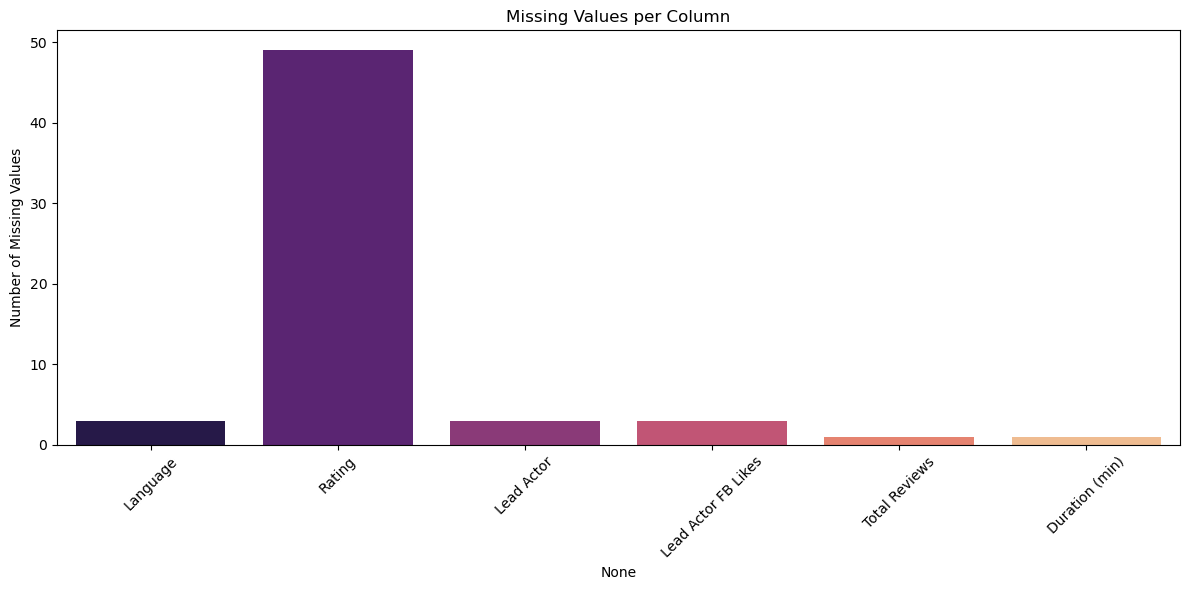

In [9]:
# Let's Visualize the missing data

missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='magma', legend=False)
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.tight_layout()
plt.show()

In [10]:
# 5. Data cleaning
# Fill with mode (most frequent)

df['Language'] = df['Language'].fillna(df['Language'].mode()[0])
df['Rating'] = df['Rating'].fillna(df['Rating'].mode()[0])
df['Lead Actor FB Likes'] = df['Lead Actor FB Likes'].fillna(df['Lead Actor FB Likes'].mode()[0])
df['Total Reviews'] = df['Total Reviews'].fillna(df['Total Reviews'].mode()[0])
df['Duration (min)'] = df['Duration (min)'].fillna(df['Duration (min)'].mode()[0])

In [11]:
# Remove the empty column

df['Lead Actor'] = df['Lead Actor'].replace(['', 'NaN', 'nan'], np.nan)
df = df.dropna(subset=['Lead Actor'])

In [12]:
# Drop duplicates

df.drop_duplicates(inplace=True)

In [13]:
# 6. Univariate Analysis
# Categorical
print(df['Genre'].value_counts())
print(df['Country'].value_counts())

Genre
Comedy         1016
Action          900
Drama           672
Adventure       362
Crime           252
Biography       204
Horror          151
Animation        45
Documentary      40
Fantasy          35
Mystery          23
Sci-Fi            8
Western           3
Family            3
Thriller          3
Romance           3
Musical           2
Name: count, dtype: int64
Country
USA               2943
UK                 304
France             104
Germany             79
Canada              62
Australia           39
Spain               22
Japan               16
China               14
Hong Kong           13
India               13
Italy               11
Mexico              10
New Zealand          9
Denmark              9
South Korea          8
Ireland              7
Brazil               5
Norway               4
Thailand             4
Iran                 4
Israel               3
South Africa         3
Russia               3
Argentina            3
Netherlands          3
Czech Republic       3

In [14]:
# Numerical
print(df['IMDb Score (1-10)'].describe())
print(df['Gross Revenue'].describe())

count    3722.000000
mean        6.462977
std         1.058981
min         1.600000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.300000
Name: IMDb Score (1-10), dtype: float64
count    3.722000e+03
mean     4.976805e+07
std      6.819506e+07
min      1.620000e+02
25%      6.454461e+06
50%      2.685746e+07
75%      6.449426e+07
max      7.605058e+08
Name: Gross Revenue, dtype: float64


In [15]:
# 7. Bivariate Analysis
# Average Rating by Genre
print(df.groupby('Genre')['IMDb Score (1-10)'].mean().sort_values(ascending=False))

Genre
Biography      7.149510
Crime          6.937698
Documentary    6.917500
Drama          6.826190
Western        6.766667
Animation      6.762222
Musical        6.750000
Sci-Fi         6.587500
Mystery        6.586957
Adventure      6.555801
Family         6.500000
Action         6.281444
Fantasy        6.234286
Comedy         6.170571
Romance        6.133333
Horror         5.790728
Thriller       5.300000
Name: IMDb Score (1-10), dtype: float64


In [16]:
# Average Gross by Country
print(df.groupby('Country')['Gross Revenue'].mean().sort_values(ascending=False))

Country
New Zealand       9.578414e+07
Taiwan            6.434068e+07
Peru              5.736258e+07
USA               5.627392e+07
South Africa      5.358008e+07
Australia         3.864051e+07
UK                3.225483e+07
Germany           2.901160e+07
Canada            2.540852e+07
Official site     2.021892e+07
China             1.913029e+07
France            1.798006e+07
Japan             1.543171e+07
Hong Kong         1.286853e+07
Chile             1.218864e+07
Hungary           1.168760e+07
West Germany      1.143313e+07
Aruba             1.007614e+07
Spain             9.807216e+06
Ireland           9.768199e+06
Romania           9.100986e+06
Mexico            8.242917e+06
Argentina         7.230936e+06
New Line          6.712451e+06
Colombia          6.517198e+06
Russia            4.819260e+06
Indonesia         4.105123e+06
Italy             3.445189e+06
India             3.120096e+06
Thailand          3.115498e+06
Brazil            2.712574e+06
South Korea       2.689505e+06


In [17]:
# Relationship between Total Reviews and IMDb Score (1-10)
print(df[['Total Reviews', 'IMDb Score (1-10)']].corr())

                   Total Reviews  IMDb Score (1-10)
Total Reviews           1.000000           0.345071
IMDb Score (1-10)       0.345071           1.000000


In [18]:
# 8. Outlier Detection
# Check percentiles for 'Gross'
print(df['Gross Revenue'].quantile([0.01, 0.99]))

0.01    1.054748e+04
0.99    3.202978e+08
Name: Gross Revenue, dtype: float64


In [19]:
# Remove extreme outliers
df = df[df['Gross Revenue'] < df['Gross Revenue'].quantile(0.99)]

In [20]:
# 9. Feature Engineering Ideas
# Create a new feature: Profit estimation (if budget available)
df['Profit'] = df['Gross Revenue'] - df['Budget']

In [21]:
# Findings:
# Top 10 Most Profitable Movies
top_profit_movies = df.sort_values('Profit', ascending=False)[['Title', 'Genre', 'Year', 'Profit']].head(10)
print("Top 10 Most Profitable Movies:")
print(top_profit_movies)

Top 10 Most Profitable Movies:
                                               Title      Genre    Year  \
144       Star Wars: Episode VI - Return of the Jedi     Action  1983.0   
103   Star Wars: Episode V - The Empire Strikes Back     Action  1980.0   
314                                       Home Alone     Comedy  1990.0   
1016                                 The Sixth Sense      Drama  1999.0   
69                                              Jaws  Adventure  1975.0   
2760                     The Twilight Saga: New Moon  Adventure  2009.0   
2735                                    The Hangover     Comedy  2009.0   
1472                        My Big Fat Greek Wedding     Comedy  2002.0   
2930                      The Twilight Saga: Eclipse  Adventure  2010.0   
589                                 Independence Day     Action  1996.0   

         Profit  
144   276625409  
103   272158751  
314   267761243  
1016  253501675  
69    252000000  
2760  246623634  
2735  242313371  

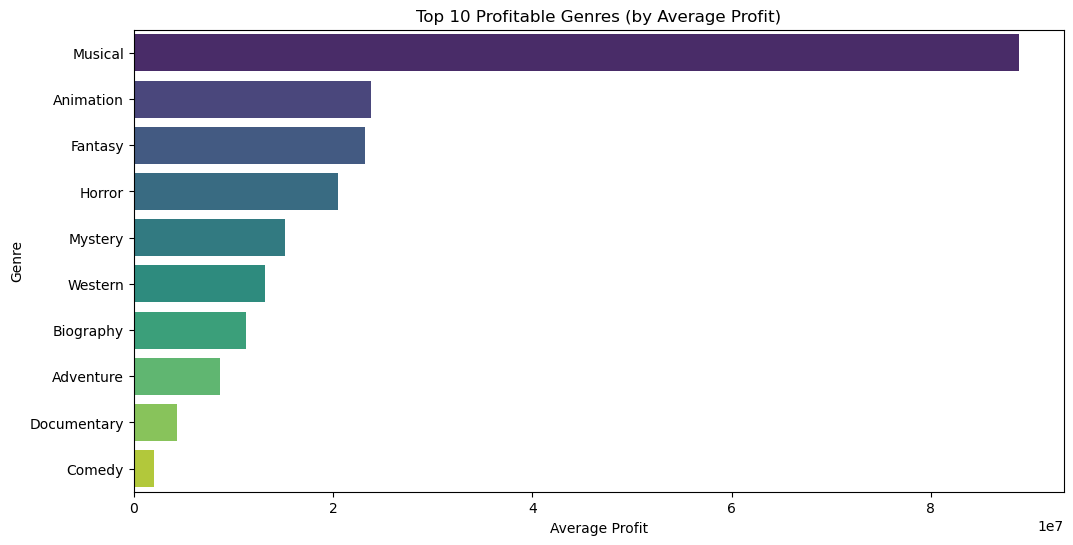

In [22]:
# Top Profitable Genres by Average Profit
genre_profit = df.groupby('Genre')['Profit'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Profit', y='Genre', hue='Genre', data=genre_profit.head(10), palette='viridis', dodge=False)
plt.legend([],[], frameon=False)  # Removes the redundant legend
plt.title("Top 10 Profitable Genres (by Average Profit)")
plt.xlabel("Average Profit")
plt.ylabel("Genre")
plt.show()


In [23]:
# Movies with Losses
loss_movies = df[df['Profit'] < 0].sort_values('Profit')[['Title', 'Genre', 'Year', 'Profit']]
print("Movies that faced losses:")
print(loss_movies.head(10))


Movies that faced losses:
                       Title      Genre    Year       Profit
2230                The Host     Comedy  2006.0 -12213298588
1964          Lady Vengeance      Crime  2005.0  -4199788333
1933                Fateless      Drama  2005.0  -2499804112
710        Princess Mononoke  Adventure  1997.0  -2397701809
1835                Steamboy     Action  2004.0  -2127109510
243                    Akira     Action  1988.0  -1099560838
938            Godzilla 2000     Action  1999.0   -989962610
842                    Tango      Drama  1998.0   -698312689
2150  Kabhi Alvida Naa Kehna      Drama  2006.0   -696724557
2839                   Kites     Action  2010.0   -598397534


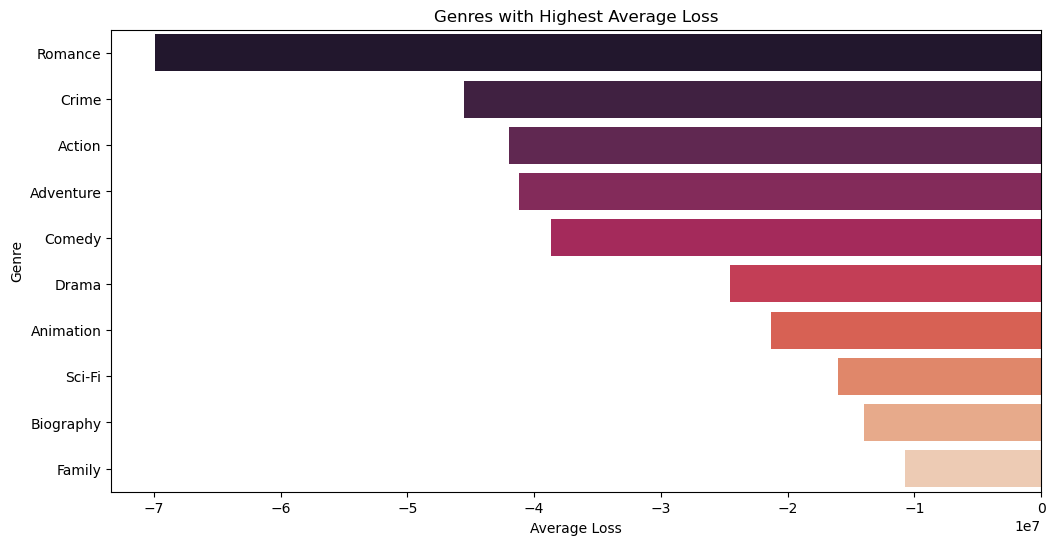

In [24]:
# Genres with Highest Average Loss
genre_loss = df[df['Profit'] < 0].groupby('Genre')['Profit'].mean().sort_values().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Profit', y='Genre', hue='Genre', data=genre_loss.head(10), palette='rocket')
plt.legend([],[], frameon=False)  # Removes the redundant legend
plt.title("Genres with Highest Average Loss")
plt.xlabel("Average Loss")
plt.ylabel("Genre")
plt.show()


In [25]:
# Reload the data from the original file
df_original = pd.read_csv("IMDB-Movie-Database.csv")

# Replace the current 'Release Date' with the original one
df['Release Date'] = df_original['Release Date']

In [26]:
print(df.head())

                            Title Release Date    Year        Color/B&W  \
0  Over the Hill to the Poorhouse   15-09-1920  1920.0  Black and White   
1                      Metropolis   26-01-1927  1927.0  Black and White   
2             The Broadway Melody   11-11-1929  1929.0  Black and White   
3                     42nd Street   29-08-1933  1933.0  Black and White   
4                         Top Hat   15-04-1935  1935.0  Black and White   

     Genre Language  Country     Rating     Lead Actor      Director Name  \
0    Crime  English      USA  Not Rated   Stephen Carr  Harry F. Millarde   
1    Drama   German  Germany  Not Rated  Brigitte Helm         Fritz Lang   
2  Musical  English      USA     Passed     Anita Page     Harry Beaumont   
3   Comedy  English      USA    Unrated  Ginger Rogers        Lloyd Bacon   
4   Comedy  English      USA   Approved  Ginger Rogers      Mark Sandrich   

   Lead Actor FB Likes  Cast FB Likes  Director FB Likes  Movie FB Likes  \
0         

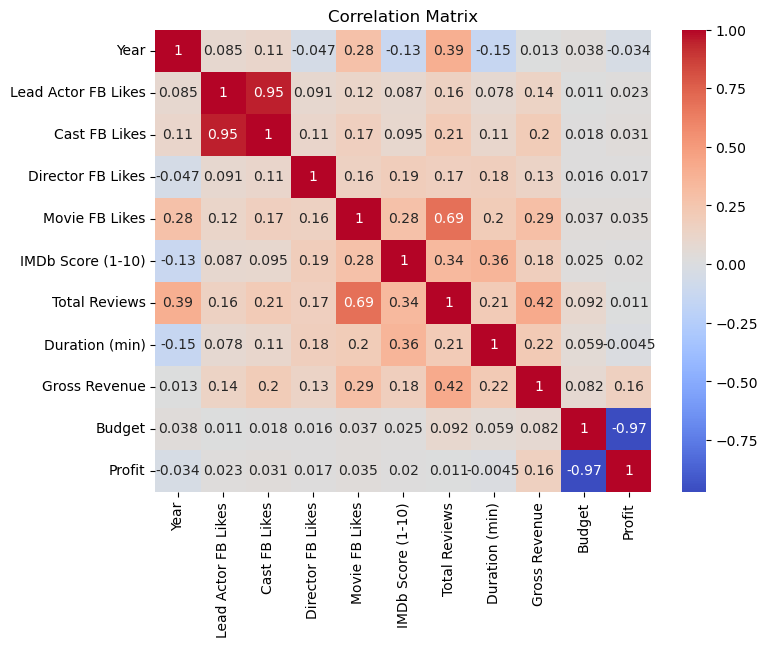

In [27]:
# 9. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
